# PAGE VIEW TIME SERIES VISUALIZER

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True, index_col="date")

## Data Summary

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.shape

(1304, 1)

## Data Cleaning

In [5]:
df = df[(df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]
df.shape

(1238, 1)

## Page Visit Number Graphic

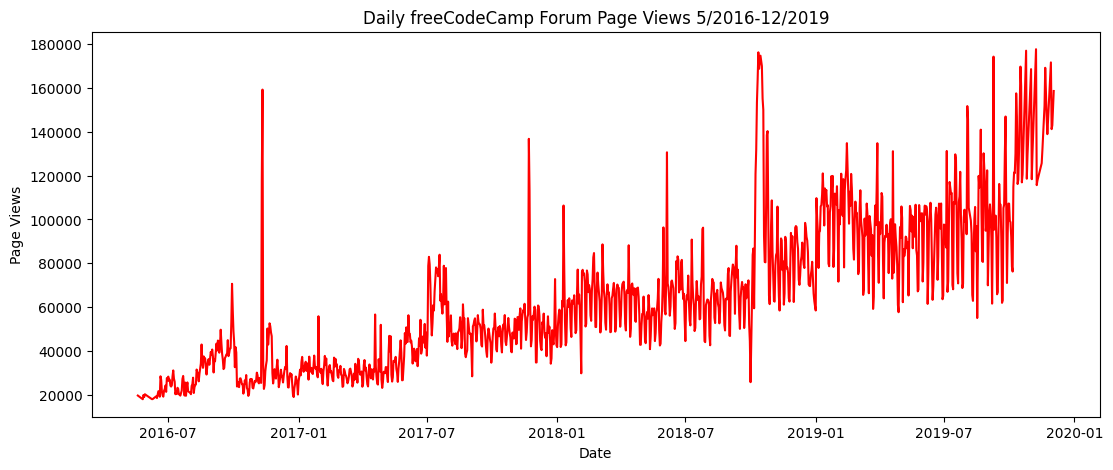

In [6]:
fig = plt.figure(figsize=(13,5))

plt.plot(df, color = "r")

plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

plt.show()

## Grouping data by year and monhtly view values 

In [7]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.strftime('%B')
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_bar.reindex(columns=months)
df_bar

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


## Monthly page views by years

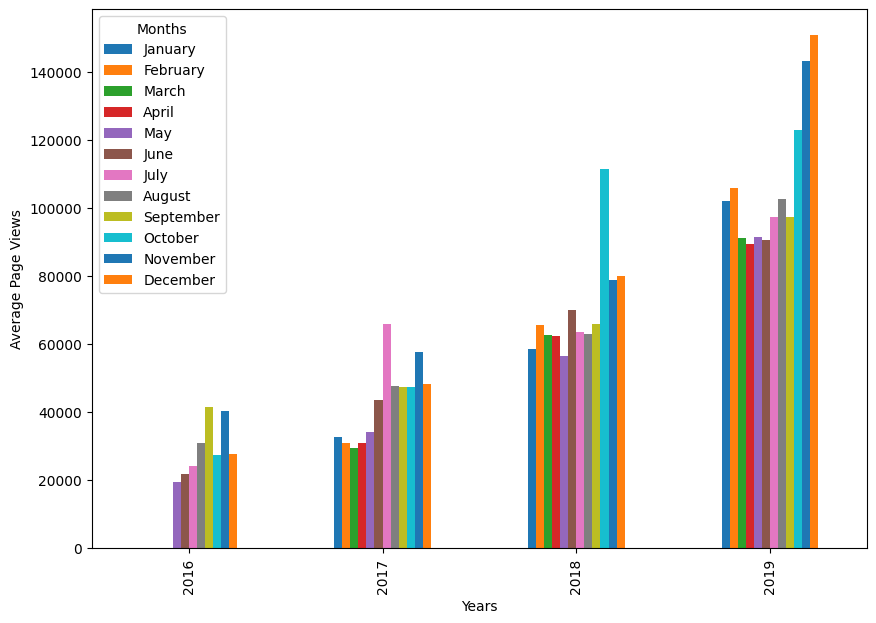

In [8]:
#ax = df_bar.plot(kind='bar', figsize=(10, 7))
#ax.set_xlabel('Years')
#ax.set_ylabel('Average Page Views')
#ax.legend(title='Months', loc='upper left')

#plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

df_bar.plot(kind='bar', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title='Months', loc='upper left')

plt.show()

In [9]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


## Year Wise and Month wise view values

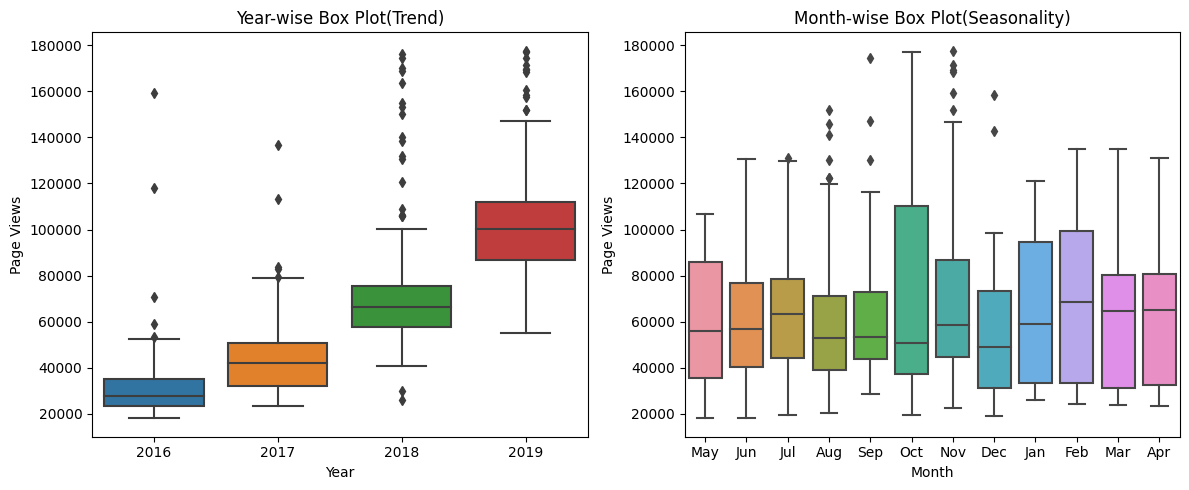

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# first box plot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title("Year-wise Box Plot(Trend)")


# second box plot
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_title("Month-wise Box Plot(Seasonality)")

plt.tight_layout()

plt.show()